<a href="https://colab.research.google.com/github/ththtec/Grupo7_ProjetoFinal/blob/main/An%C3%A1lis_do_Carnaval_BH_Python_%26_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Análise do Carnavel de BH com SQL e Python

Este notebook realiza uma análise completa sobre uma base de dados de Carnavel 2023 de Belo Horizonte.

 Usaremos SQL para as consultas e Python (com as bibliotecas Sqlite3, Pandas, Numpy, Matplotlib.pyplot, Seaborn e Squarify) para a manipulação e visualização dos dados..

## Passo 1: Configuração do Ambiente

In [69]:
# Análise_Carnaval_Grupo3_7_PROJETOFINAL.ipynb
# Notebook de análise dos dados do Carnaval - Grupo 3_7




# importando bibliotecas
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import plotly.express as px
from sqlalchemy import create_engine
warnings.filterwarnings("ignore")
!pip install squarify

# configurações de visualização para os gráficos e tabelas
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)


# criando conexão com banco SQLite em memória
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()



print("\n 📚 Ambiente configurado e conexão com o banco de dados estabelecida.\n")


 📚 Ambiente configurado e conexão com o banco de dados estabelecida.



##Passo 2: Inserção dos Dados

Aqui usamos o arquivo tabelafianl.csv

In [70]:
# importa a biblioteca para upload de arquivos no google colab
from google.colab import files

# abre o seletor de arquivos para envio do computador local
uploaded = files.upload()

Saving tabelafinal.csv to tabelafinal (2).csv


In [71]:
from sqlalchemy import create_engine

df = pd.read_csv('tabelafinal.csv') # leitura do CSV
engine = create_engine('sqlite:///tabelafinal.db')# conexão com sqlite
df.to_sql('tabelafinal', con=engine, if_exists='replace', index=False)# envio para o banco

print("Dados carregados com sucesso!")

Dados carregados com sucesso!


##Passo 3: Visualizando o DF

In [72]:
# função auxiliar para executar queries e retornar df
def executar_query(query, engine):
    """Executa uma query SQL e retorna o resultado como um DataFrame do Pandas."""
    return pd.read_sql_query(query, engine)
print("Função 'executar_query' criada.")

Função 'executar_query' criada.


In [ ]:
# executa a consulta e retorna os dados como df

display(pd.read_sql_query("SELECT * FROM tabelafinal LIMIT 5", engine))

,bloquinho,idade,faixaetaria,morador,estado,ufpais,pernoitar,quantaspernoites,meiodehospedagem,transporteparacidade,...,genero,escolaridade,estadocivil,renda,faixarenda,rendamedia,transporteblocos,apoioLGBTQIA,fazparteLGBTQIA,data
0,RODA DE TIMBAU,54,Meia-idade,Morador,Minas Gerais,Brasil,None,None,None,None,...,Feminino,Ensino Superior completo,Divorciado(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),Entre 3 e 5 SM,5208.0,Onibus coletivo,Sim,Nao,2023-02-17
1,SEXTA NINGUEM SABE,30,Adulto,Morador,Minas Gerais,Brasil,None,None,None,None,...,Masculino,Ensino Superior completo,Divorciado(a),Entre 5 SM e 7 SM (R$6.51001 a R$ 9.11400),Entre 5 e 7 SM,7812.0,Veiculo Proprio,Sim,Nao,2023-02-17
2,RODA DE TIMBAU,24,Jovem,Morador,Minas Gerais,Brasil,None,None,None,None,...,Masculino,Ensino Medio completo,Solteiro(a),Entre 5 SM e 7 SM (R$6.51001 a R$ 9.11400),Entre 5 e 7 SM,7812.0,Onibus coletivo,Sim,Sim,2023-02-17
3,SEXTA NINGUEM SABE,47,Meia-idade,Morador,Minas Gerais,Brasil,None,None,None,None,...,Feminino,Posgraduacao/ Mestrado/ Doutorado completo,Divorciado(a),Entre 5 SM e 7 SM (R$6.51001 a R$ 9.11400),Entre 5 e 7 SM,7812.0,Aplicativos (Uber/99/InDrive),Sim,Nao,2023-02-17
4,RODA DE TIMBAU,44,Meia-idade,Morador,Minas Gerais,Brasil,None,None,None,None,...,Masculino,Ensino Medio completo,Divorciado(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),Entre 3 e 5 SM,5208.0,Aplicativos (Uber/99/InDrive),Sim,Sim,2023-02-17


## Analises

### Perfil dos Participantes

In [51]:
# query para analisar o perfil dos participantes
query_perfil = """
SELECT
  genero,
  escolaridade,
  estadocivil,
  renda,
  COUNT(*) AS total_pessoas
FROM tabelafinal
GROUP BY genero, escolaridade, estadocivil, renda
ORDER BY total_pessoas DESC;
"""

def executar_query(query, engine):
    return pd.read_sql_query(query, engine)
display(executar_query(query_perfil, engine))

,genero,escolaridade,estadocivil,renda,total_pessoas
0,Masculino,Ensino Superior completo,Solteiro(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),60
1,Feminino,Ensino Superior completo,Solteiro(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),45
2,Masculino,Ensino Medio completo,Solteiro(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),45
3,Masculino,Ensino Medio completo,Solteiro(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),42
4,Feminino,Ensino Medio completo,Solteiro(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),41
...,...,...,...,...,...
168,Outros,Ensino Medio completo,Solteiro(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),1
169,Outros,Ensino Superior completo,Casado(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),1
170,Outros,Ensino Superior completo,Solteiro(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),1
171,Outros,Ensino Superior completo,Viuvo(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),1


### Média e Mediana de Idade

In [43]:
# query que calcula a média de 'idade'
query_idade = """
      SELECT
          AVG(idade) AS media_geral
      FROM
          tabelafinal
      WHERE
          idade IS NOT NULL;
  """
df_idade_media = executar_query(query_idade, engine)

# query para mediana
query_idade_median_data = """
SELECT idade
FROM tabelafinal
WHERE idade IS NOT NULL;
"""
df_idade_data = executar_query(query_idade_median_data, engine)

# calculando a mediana
median_idade = df_idade_data['idade'].median()

print("\n-- Média e Mediana de Idade --")
print(f"Média Geral: {df_idade_media['media_geral'].iloc[0]:.2f}")
print(f"Mediana Geral: {median_idade:.2f}")


-- Média e Mediana de Idade --
Média Geral: 33.12
Mediana Geral: 30.00


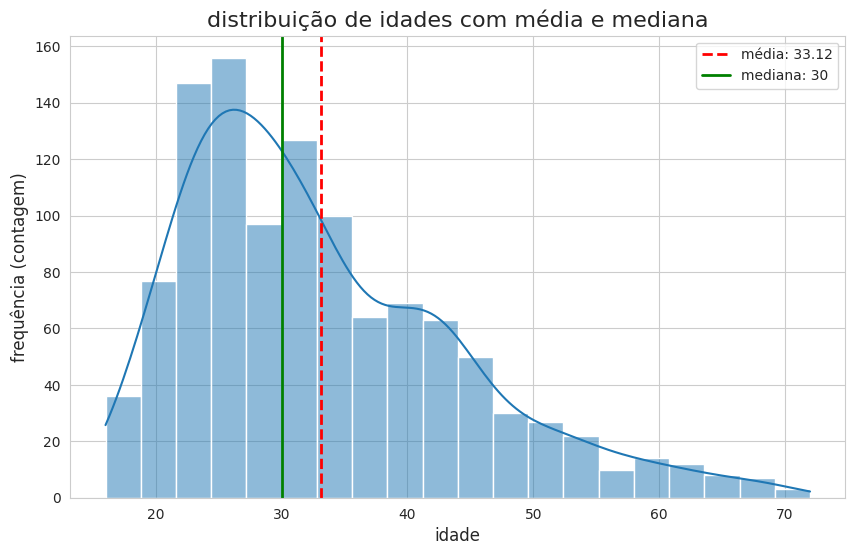

In [52]:
plt.figure(figsize=(10, 6))  # define o tamanho da figura

sns.histplot(data=df_idade_data, x='idade', kde=True, bins=20)  # curva de densidade

plt.axvline(df_idade_media['media_geral'].iloc[0],              # adiciona linha vertical na média
            color='red', linestyle='--', linewidth=2,
            label=f'média: {df_idade_media["media_geral"].iloc[0]:.2f}')  # mostra valor da média com duas casas decimais

plt.axvline(median_idade,                                      # adiciona linha vertical na mediana
            color='green', linestyle='-', linewidth=2,
            label=f'mediana: {median_idade:.0f}')  # mostra valor da mediana como número inteiro

plt.title('distribuição de idades com média e mediana', fontsize=16)  # título do gráfico
plt.xlabel('idade', fontsize=12)                                     # rótulo do eixo x
plt.ylabel('frequência (contagem)', fontsize=12)                     # rótulo do eixo y
plt.legend()                                                         # exibe legenda com média e mediana
plt.show()


### Distribuição de Renda

In [22]:
# agrupando por faixa de renda e contar número de pessoas
df_renda = (
    df.groupby("renda")
    .size()
    .reset_index(name="total")
)

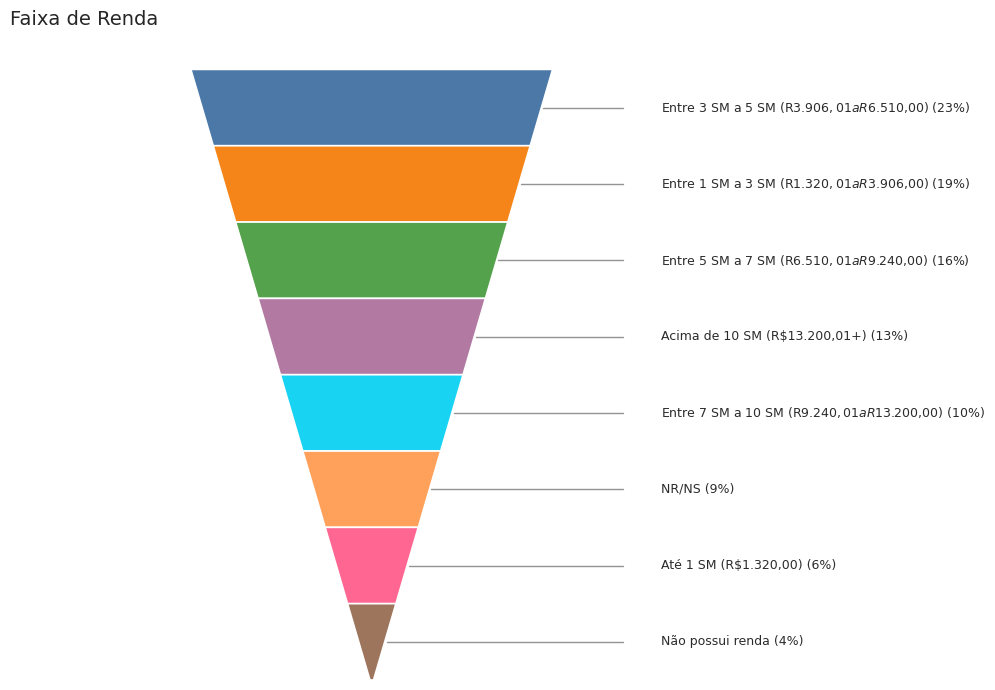

In [ ]:
# df agrupado
df_renda = pd.DataFrame({
    "Faixa de Renda": [
        "Entre 3 SM a 5 SM (R$3.906,01 a R$6.510,00)",
        "Entre 1 SM a 3 SM (R$1.320,01 a R$3.906,00)",
        "Entre 5 SM a 7 SM (R$6.510,01 a R$9.240,00)",
        "Acima de 10 SM (R$13.200,01+)",
        "Entre 7 SM a 10 SM (R$9.240,01 a R$13.200,00)",
        "NR/NS",
        "Até 1 SM (R$1.320,00)",
        "Não possui renda"
    ],
    "Total Pessoas": [120, 100, 85, 70, 55, 45, 30, 20]
})

# ordenando o maior para o menor (topo -> base)
df_plot = df_renda.sort_values("Total Pessoas", ascending=False).reset_index(drop=True)
tot = df_plot["Total Pessoas"].sum()
df_plot["pct"] = df_plot["Total Pessoas"] / tot

# parâmetros visuais
n = len(df_plot)
H = 1.0
h = H / n
W_top = 4.0            # AQUI deixamos a pirâmide mais larga (!!!)
tip_ratio = 0.01
W_bottom = W_top * tip_ratio

colors = [
    "#4C78A8", "#F58518", "#54A24B", "#B279A2",
    "#19D3F3", "#FFA15A", "#FF6692", "#9D755D"
][:n]

def width_at_y(y):
    return W_top + (W_bottom - W_top) * y

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_facecolor("#ECF2FA")

y_edges = np.linspace(0, H, n + 1)


# pirâmide centralizada
for i, (label, val, pct, col) in enumerate(zip(df_plot["Faixa de Renda"], df_plot["Total Pessoas"], df_plot["pct"], colors)):
    y_top = y_edges[i]
    y_bot = y_edges[i + 1]
    W_t = width_at_y(y_top)
    W_b = width_at_y(y_bot)

    x_left_top  = -W_t / 2
    x_right_top =  W_t / 2
    x_left_bot  = -W_b / 2
    x_right_bot =  W_b / 2

    poly_x = [x_left_top, x_right_top, x_right_bot, x_left_bot]
    poly_y = [1 - y_top,  1 - y_top,  1 - y_bot,  1 - y_bot]
    ax.fill(poly_x, poly_y, color=col, edgecolor="white", linewidth=1.2)


#  rótulos e linhas
label_gap = 0.02
x_right_edge_for_text = 0.8 * W_top
x_line_end            = 0.7 * W_top

for i, (label, pct) in enumerate(zip(df_plot["Faixa de Renda"], df_plot["pct"])):
    y_top = y_edges[i]
    y_bot = y_edges[i + 1]
    y_mid = 1 - (y_top + y_bot) / 2
    W_mid = width_at_y((y_top + y_bot) / 2)
    x_edge = W_mid / 2

    ax.plot([x_edge + label_gap, x_line_end - label_gap], [y_mid, y_mid],
            color="gray", linewidth=1, alpha=0.85)

    ax.text(x_right_edge_for_text, y_mid, f"{label} ({pct:.0%})",
            va="center", ha="left", fontsize=9, color="#2b2b2b")


# acabamento
pad = 0.2 * W_top
ax.set_xlim(-0.8 * W_top - pad, 0.8 * W_top + pad)  # limites
ax.set_ylim(0, 1.05)
ax.set_aspect('auto')
ax.axis("off")
ax.set_title("Faixa de Renda", loc="left", fontsize=14, pad=10)

plt.tight_layout()
plt.show()

### Distribuição de Moradores vs. Visitantes

In [ ]:
# query da distribuição de moradores
query_moradores = """
SELECT
  morador,
  COUNT(*) AS quantidade,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS porcentagem
FROM tabelafinal
GROUP BY morador;
"""

df_moradores = executar_query(query_moradores, engine)
print("\n📍 Distribuição: Moradores vs. Visitantes")
display(df_moradores)


📍 Distribuição: Moradores vs. Visitantes


,morador,quantidade,porcentagem
0,Morador,950,84.9
1,Visitante,169,15.1


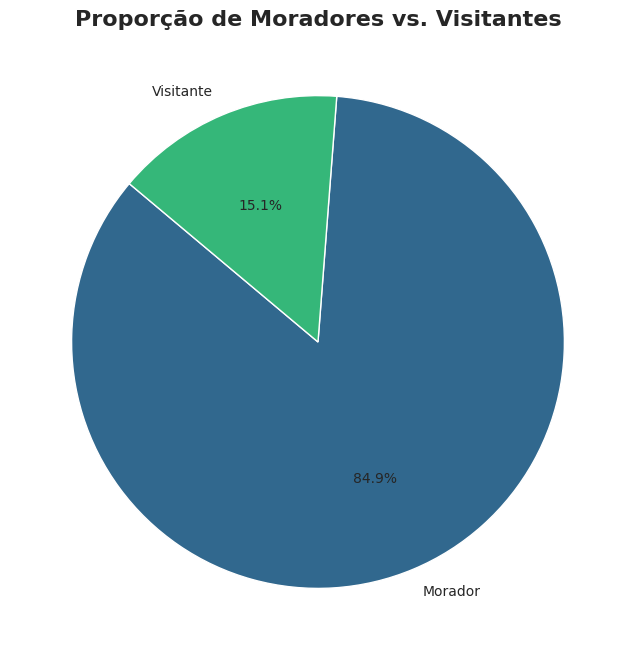

In [ ]:
#visualizando a proporção entre moradores e visitantes
plt.figure(figsize=(8, 8))
plt.pie(
    df_moradores['quantidade'],
    labels=df_moradores['morador'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(df_moradores))
)
plt.title('Proporção de Moradores vs. Visitantes', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

### Fontes de Informação

Quais são as principais fontes de informação que os foliões utilizam para saber sobre a programação do carnaval?

In [ ]:
# query das fontes de informação
query_info = """
SELECT
  fonteinfocarnaval,
  COUNT(*) AS qtd_respostas
FROM `tabelafinal`
WHERE fonteinfocarnaval IS NOT NULL
GROUP BY fonteinfocarnaval
ORDER BY qtd_respostas DESC;
"""
df_info = executar_query(query_info, engine)
print("\n📰 Principais Fontes de Informação sobre o Carnaval")
display(df_info)



📰 Principais Fontes de Informação sobre o Carnaval


,fonteinfocarnaval,qtd_respostas
0,Amigos/Parentes,82
1,Midias sociais,34
2,Internet,29
3,Ja conhece,10
4,Sites de noticias,6
5,NR_NS,3
6,Ja morou em Belo Horizonte,3
7,Pessoas fantasiadas,1
8,Folhetos,1


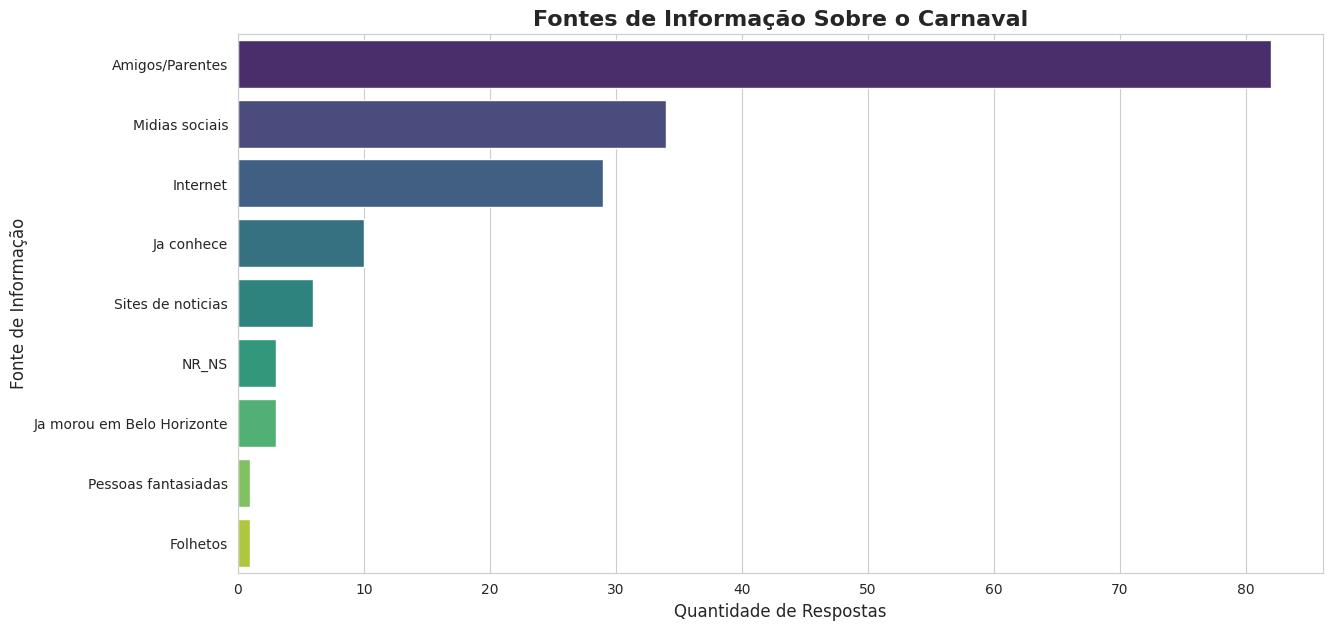

In [ ]:
# visualização
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_info,
    x='qtd_respostas',
    y='fonteinfocarnaval',
    hue='fonteinfocarnaval',  # atribui o y ao hue
    palette='viridis',
    dodge=False,              # evita separação das barras
    legend=False              # remove legenda duplicada
)
plt.title('Fontes de Informação Sobre o Carnaval', fontsize=16, weight='bold')# título do gráfico
plt.xlabel('Quantidade de Respostas', fontsize=12)# rótulo do eixo x
plt.ylabel('Fonte de Informação', fontsize=12)# rótulo do eixo x
plt.show()


###Popularidade dos Bloccos

Quais foram os blocos mais frequentados segundo os entrevistados?

In [ ]:
query_blocos = """
SELECT
  bloquinho,
  COUNT(*) AS total_pessoas
FROM `tabelafinal`
GROUP BY bloquinho
ORDER BY total_pessoas DESC;
"""
df_blocos = executar_query(query_blocos, engine)
print("\n🎶 Popularidade dos Blocos (Top 15)")
display(df_blocos.head(15))


🎶 Popularidade dos Blocos (Top 15)


,bloquinho,total_pessoas
0,QUANDO COME SE LAMBUZA,92
1,FUNK YOU,92
2,ENTAO BRILHA!,92
3,BLOCO DA CALIXTO,92
4,BAIANAS OZADAS,91
5,BLOCO ANGOLA JANGA,79
6,HAVAYANAS USADAS,64
7,BATUQUE COLETIVO,63
8,BEICO DO WANDO,62
9,BAIANEIROS,60


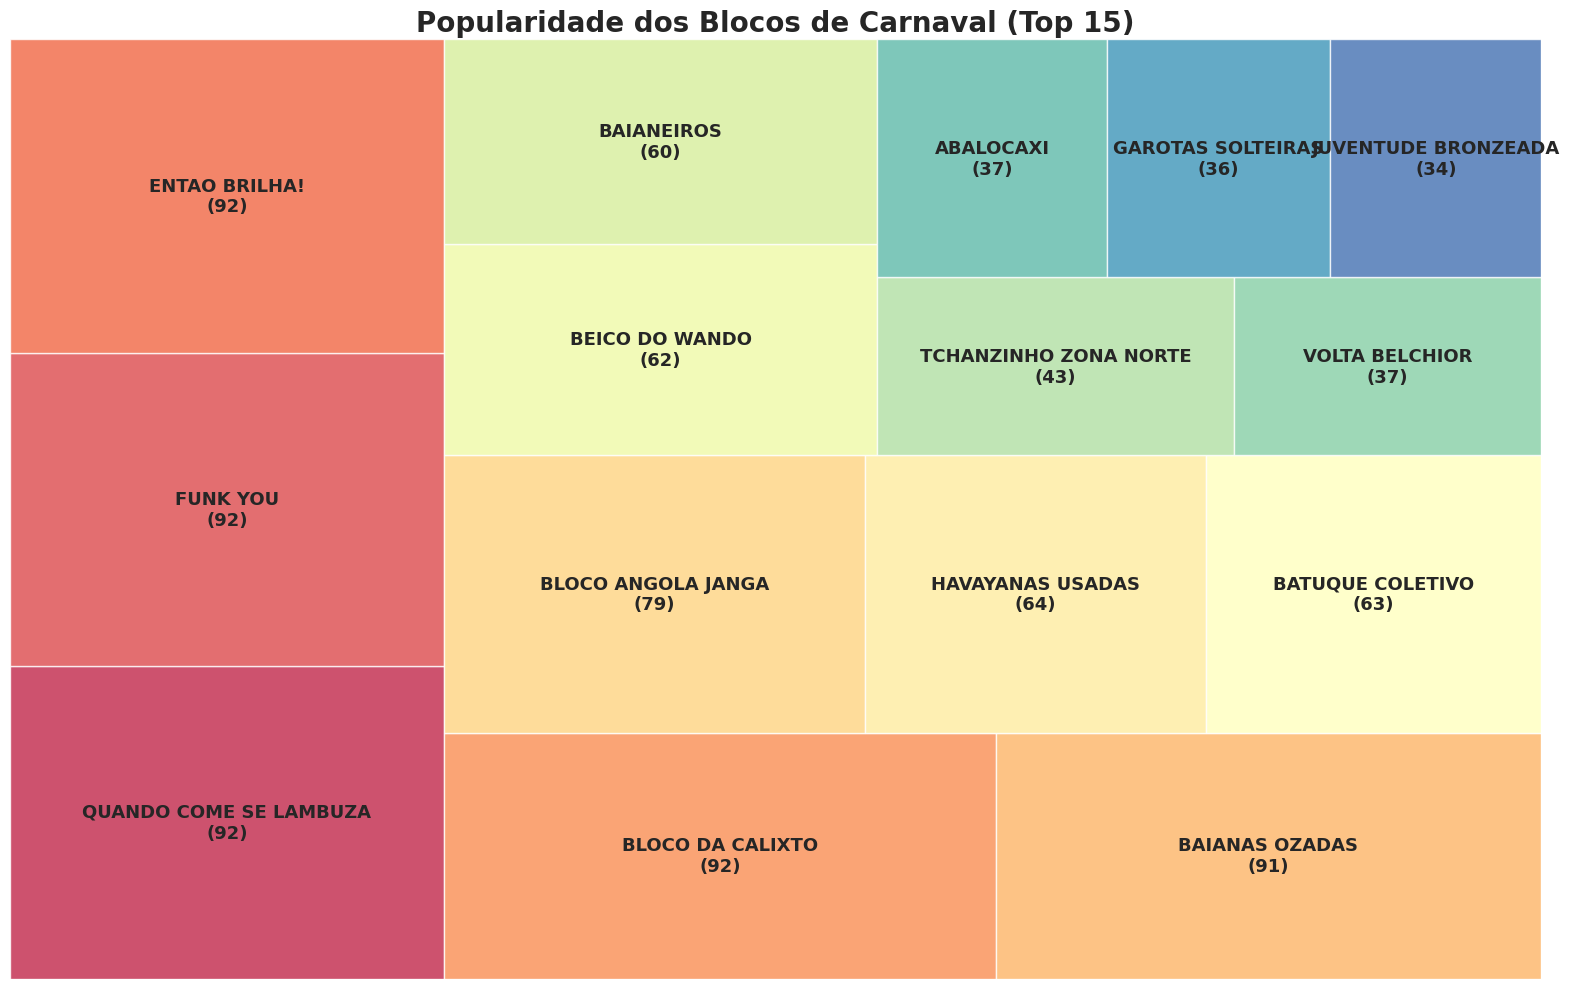

In [ ]:

# selecioando o top 5 do df_blocos
top_15_blocos = df_blocos.head(15)

sizes = top_15_blocos['total_pessoas']
labels = [f"{nome}\n({contagem})" for nome, contagem in zip(top_15_blocos['bloquinho'], top_15_blocos['total_pessoas'])]

# cores vibrantes
colors = sns.color_palette('Spectral', len(sizes))

# treemap estilizado
plt.figure(figsize=(16, 10))
sq.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 13, 'weight': 'bold'},

)
# título e layout
plt.title('Popularidade dos Blocos de Carnaval (Top 15)', fontsize=20, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### Principais Patrocinadores

In [37]:
# query para top 10 patrocinadores
query_patrocinador = """
WITH contagem_total AS (
    SELECT CAST(COUNT(patrocinador) AS REAL) as total_validas
    FROM tabelafinal
    WHERE patrocinador IS NOT NULL AND patrocinador != ''
),
contagem_patrocinador AS (
    SELECT
        -- SE o valor for 'Não respondeu' ou 'Não sabe', ele é renomeado.
        -- SENÃO, ele mantém o valor original.
        CASE
            WHEN patrocinador IN ('Não respondeu', 'Não sabe')
            THEN 'Não sabe / Não respondeu'
            ELSE patrocinador
        END AS patrocinador_agrupado,
        COUNT(*) AS citacoes
    FROM tabelafinal
    WHERE patrocinador IS NOT NULL AND patrocinador != ''
    -- O agrupamento agora é feito pela nova categoria.
    GROUP BY patrocinador_agrupado
)
SELECT
    p.patrocinador_agrupado AS patrocinador,
    p.citacoes AS "Citações (N)",
    ROUND((p.citacoes / t.total_validas) * 100, 2) AS "Percentual (%)"
FROM
    contagem_patrocinador p,
    contagem_total t
ORDER BY
    "Citações (N)" DESC
LIMIT 10;
"""

df_patrocinadores = executar_query(query_patrocinador, engine)
print("\n-- Top 10 Patrocinadores --")
display(df_patrocinadores)


-- Top 10 Patrocinadores --


,patrocinador,Citações (N),Percentual (%)
0,Prefeitura,341,30.47
1,Nao sabe,170,15.19
2,Ambev,137,12.24
3,Brahma,98,8.76
4,Nao respondeu,91,8.13
5,Belotur,65,5.81
6,Populacao,57,5.09
7,Skol,27,2.41
8,Cemig,24,2.14
9,Blocos,14,1.25


### Inclusão e Apoio à Comunidade LGBTQIA+

Vamos analisar as respostas sobre fazer parte e apoiar a comunidade LGBTQIA+.

In [ ]:
# Query para inclusão LGBTQIA+
query_lgbtqia = """
SELECT
  apoioLGBTQIA,
  fazparteLGBTQIA,
  COUNT(*) AS total
FROM `tabelafinal`
GROUP BY apoioLGBTQIA, fazparteLGBTQIA
ORDER BY total DESC;
"""
df_lgbtqia = executar_query(query_lgbtqia, engine)
print("\n Apoio e Inclusão da Comunidade LGBTQIA+")
display(df_lgbtqia)



 Apoio e Inclusão da Comunidade LGBTQIA+


,apoioLGBTQIA,fazparteLGBTQIA,total
0,Sim,Nao,722
1,Sim,Sim,356
2,NS/NR,Nao,22
3,Nao,Nao,18
4,Sim,NS/NR,1


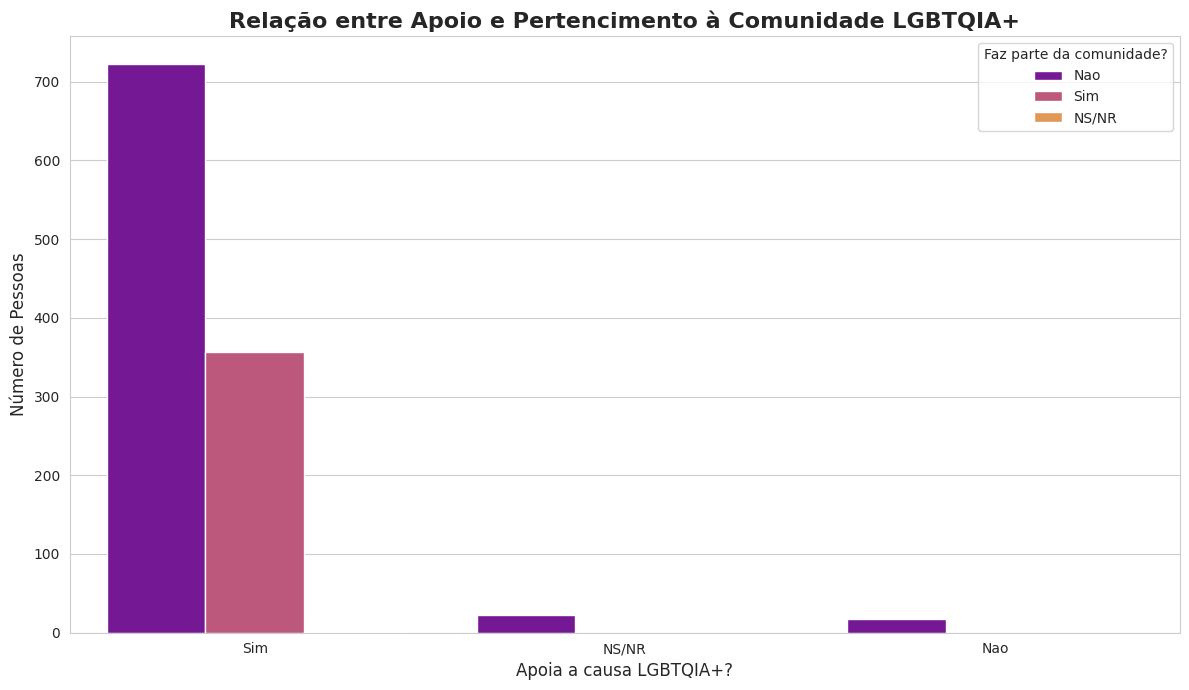

In [ ]:
# gráfico de barras agrupadas para comparar as categorias
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_lgbtqia,
    x='apoioLGBTQIA',
    y='total',
    hue='fazparteLGBTQIA',
    palette='plasma'
)

plt.title('Relação entre Apoio e Pertencimento à Comunidade LGBTQIA+', fontsize=16, weight='bold') # título do gráfico
plt.xlabel('Apoia a causa LGBTQIA+?', fontsize=12)# rótulo do eixo x
plt.ylabel('Número de Pessoas', fontsize=12)# rótulo do eixo y
plt.legend(title='Faz parte da comunidade?') # legenda
plt.xticks(rotation=0) # define a legenda na rotação 0 para facilitar a leitura.
plt.tight_layout() # ajusta o layout
plt.show()

###Avaliação Geral e por Categoria

Qual é a média das avaliações para os quesitos: Geral, Banheiros, Segurança e Preços? A escala vai de 1 a 10.

In [79]:
# query para médias das avaliações
query_medias = """
SELECT
  'avaliacao_geral' AS coluna,
  SUM(CASE WHEN avaliacao_geral != 999999 THEN 1 ELSE 0 END) AS total_respostas,
  MIN(NULLIF(avaliacao_geral, 999999)) AS minimo,
  MAX(NULLIF(avaliacao_geral, 999999)) AS maximo,
  ROUND(AVG(NULLIF(avaliacao_geral, 999999)), 2) AS media
FROM tabelafinal

UNION ALL
SELECT
  'banheiros',
  SUM(CASE WHEN banheiros != 999999 THEN 1 ELSE 0 END),
  MIN(NULLIF(banheiros, 999999)),
  MAX(NULLIF(banheiros, 999999)),
  ROUND(AVG(NULLIF(banheiros, 999999)), 2)
FROM tabelafinal

UNION ALL
SELECT
  'seguranca',
  SUM(CASE WHEN seguranca != 999999 THEN 1 ELSE 0 END),
  MIN(NULLIF(seguranca, 999999)),
  MAX(NULLIF(seguranca, 999999)),
  ROUND(AVG(NULLIF(seguranca, 999999)), 2)
FROM tabelafinal

UNION ALL
SELECT
  'precos',
  SUM(CASE WHEN precos != 999999 THEN 1 ELSE 0 END),
  MIN(NULLIF(precos, 999999)),
  MAX(NULLIF(precos, 999999)),
  ROUND(AVG(NULLIF(precos, 999999)), 2)
FROM tabelafinal
"""

df_medias = executar_query(query_medias, engine)
print("\n📊 Média das Avaliações (de 1 a 10)")
display(df_medias)


📊 Média das Avaliações (de 1 a 10)


,coluna,total_respostas,minimo,maximo,media
0,avaliacao_geral,1119,0,10,8.61
1,banheiros,1119,0,10,5.77
2,seguranca,1119,0,10,7.27
3,precos,1119,0,10,5.85


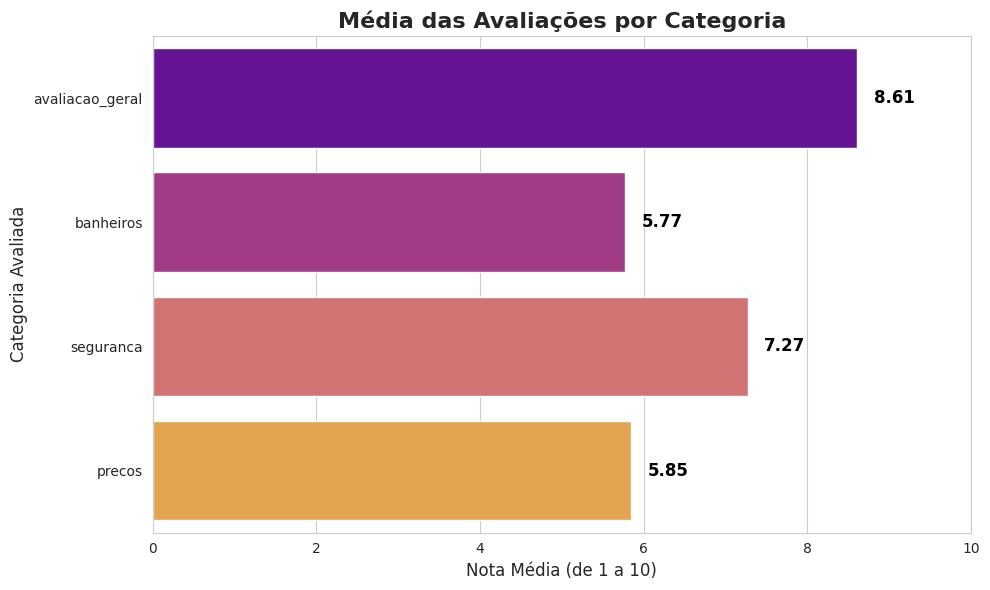

In [85]:
# reformatando o dataframe para visualização
df_medias_melted = df_medias[['coluna', 'media']].rename(columns={'coluna': 'Categoria', 'media': 'Média'})

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_medias_melted,
    x='Média',
    y='Categoria',
    palette='plasma'
)

# adicionando os valores nas barras com espaçamento e negrito
for index, value in enumerate(df_medias_melted['Média']):
    plt.text(value + 0.2, index, f'{value:.2f}', color='black', ha="left", va='center', size=12, weight='bold')

plt.title('Média das Avaliações por Categoria', fontsize=16, weight='bold')
plt.xlabel('Nota Média (de 1 a 10)', fontsize=12)
plt.ylabel('Categoria Avaliada', fontsize=12)
plt.xlim(0, 10)  # limite do eixo x para a escala de 1 a 10
plt.tight_layout()
plt.show()




###Visitantes Brasileiros por Estado

In [ ]:
# mapa do Brasil para visitantes BRASILEIROS por ESTADO
query_estados_brasil = """
SELECT
  ufpais,
  estado,
  COUNT(*) AS total_visitantes
FROM tabelafinal
GROUP BY ufpais, estado
ORDER BY ufpais, total_visitantes DESC;
"""

df_estados_br = executar_query(query_estados_brasil, engine)
print("\n🇧🇷 Distribuição de Visitantes Brasileiros por Estado:")
display(df_estados_br)


🇧🇷 Distribuição de Visitantes Brasileiros por Estado:


,ufpais,estado,total_visitantes
0,Brasil,Minas Gerais,1061
1,Brasil,Sao Paulo,20
2,Brasil,Espirito Santo,7
3,Brasil,Rio de Janeiro,5
4,Brasil,Mato Grosso,3
5,Brasil,Distrito Federal,3
6,Brasil,Bahia,3
7,Brasil,Rio Grande do Sul,2
8,Brasil,Rio Grande do Norte,2
9,Brasil,Parana,2


In [ ]:
# lista oficial de estados brasileiros
estados_brasil = [
    "Acre", "Alagoas", "Amapá", "Amazonas", "Bahia", "Ceará", "Distrito Federal",
    "Espírito Santo", "Goiás", "Maranhão", "Mato Grosso", "Mato Grosso do Sul",
    "Minas Gerais", "Pará", "Paraíba", "Paraná", "Pernambuco", "Piauí",
    "Rio de Janeiro", "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia",
    "Roraima", "Santa Catarina", "São Paulo", "Sergipe", "Tocantins"
]

# correção de nomes para compatibilidade com GeoJSON
correcao_nomes = {
    "Sao Paulo": "São Paulo",
    "Espirito Santo": "Espírito Santo",
    "Parana": "Paraná",
    "Piaui": "Piauí",
    "Goias": "Goiás",
    "Ceara": "Ceará",
    "Para": "Pará",
    "Rondonia": "Rondônia",
    "Roraima": "Roraima",
    "Santa Catarina": "Santa Catarina",
    "Sergipe": "Sergipe",
    "Tocantins": "Tocantins"
}

# query
query_estados_brasil_sqlite = """
SELECT
  TRIM(estado) AS estado_brasileiro,
  COUNT(*) AS total_visitantes
FROM tabelafinal
WHERE morador = 'Visitante' AND (ufpais = 'BR' OR LOWER(ufpais) = 'brasil')
GROUP BY estado
ORDER BY total_visitantes DESC;
"""

# executando a query
df_estados_br = executar_query(query_estados_brasil_sqlite, engine)

# nomes padronizados
df_estados_br["estado_brasileiro"] = df_estados_br["estado_brasileiro"].str.title().str.strip()
df_estados_br["estado_brasileiro"] = df_estados_br["estado_brasileiro"].replace(correcao_nomes)

# garantihndo que todos os estados apareçam
df_mapa = pd.DataFrame({"estado": estados_brasil})
df_mapa = df_mapa.merge(df_estados_br, how="left", left_on="estado", right_on="estado_brasileiro")
df_mapa["total_visitantes"] = df_mapa["total_visitantes"].fillna(0).astype(int)

# classificar faixas de visitantes
def classificar_faixa(valor):
    if valor == 0:
        return "Sem visitantes"
    elif valor <= 5:
        return "1 a 5"
    elif valor <= 20:
        return "6 a 20"
    else:
        return "21+"

df_mapa["faixa_visitantes"] = df_mapa["total_visitantes"].apply(classificar_faixa)

# cores personalizadas para cada faixa
cores_personalizadas = {
    "Sem visitantes": "#d3d3d3",  # Cinza claro
    "1 a 5": "#a6cee3",           # Azul claro
    "6 a 20": "#1f78b4",          # Azul médio
    "21+": "#08306b"              # Azul escuro
}

# criando mapa coroplético
fig = px.choropleth(
    df_mapa,
    geojson="https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson",
    locations="estado",
    featureidkey="properties.name",
    color="faixa_visitantes",
    color_discrete_map=cores_personalizadas,
    title="🗺️ Visitantes Brasileiros por Estado - Carnaval BH (Faixas)"
)

# ajustes visuais
fig.update_geos(fitbounds="locations", visible=False)
fig.update_traces(marker_line_color="black", marker_line_width=0.5)

fig.show()



###🌎 Distribuição de Visitantes por País

In [ ]:
# query que agrupa os dados por país (`ufpais`)
query_paises = """
SELECT
  ufpais AS pais,
  COUNT(*) AS total_visitantes
FROM tabelafinal
GROUP BY ufpais
ORDER BY total_visitantes DESC;
"""

df_paises = executar_query(query_paises, engine)
print(" Distribuição por Países:")
display(df_paises)

 Distribuição por Países:


,pais,total_visitantes
0,Brasil,1116
1,Irlanda,1
2,Franca,1
3,Canada,1


In [ ]:
# df com países e quantidade de visitantes
tabela_paises = pd.DataFrame({
    "Pais": ["Brazil", "Canada", "Franca", "Irlanda"],
    "Qtd_Visitantes": [997, 1, 1, 1]
})

# corrigndo nomes para os reconhecidos pelo Plotly
corrigir_nomes = {
    "Franca": "France",
    "Irlanda": "Ireland",
    "Brazil": "Brazil",
    "Canada": "Canada"
}
tabela_paises["Pais"] = tabela_paises["Pais"].map(corrigir_nomes)

#crindo mapa com cor fixa para todos os países que tiveram visitantes
import plotly.express as px
fig = px.choropleth(
    tabela_paises,
    locations="Pais",
    locationmode="country names",
    color_discrete_sequence=["#1f77b4"],  # Azul fixo
    title="🌍 Países com Visitantes Destacados"
)

# Forçar todos os selecionados a ficarem com a mesma cor
fig.update_traces(marker_line_color="black", marker_line_width=0.5)

#cinza para países sem visitantes
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    projection_type="natural earth",
    bgcolor="white",
    landcolor="lightgray"
)

fig.show()

###Principais Meios de Transporte para a Cidade

Como os foliões chegaram a Belo Horizonte? Esta análise mostra os meios de transporte mais utilizados.





In [ ]:

# query para meios de transporte
query_transporte = """
SELECT
  transporteparacidade,
  COUNT(*) AS total
FROM tabelafinal
WHERE transporteparacidade IS NOT NULL
GROUP BY transporteparacidade
ORDER BY total DESC;
"""
df_transporte = executar_query(query_transporte, engine)
print("\n Principais Meios de Transporte")
display(df_transporte.head(5))



 Principais Meios de Transporte


,transporteparacidade,total
0,Carro/Moto,66
1,Onibus rodoviario,56
2,Aviao,32
3,APP onibus (Buser Click Bus),7
4,APP carro (Uber 99 In driver),7


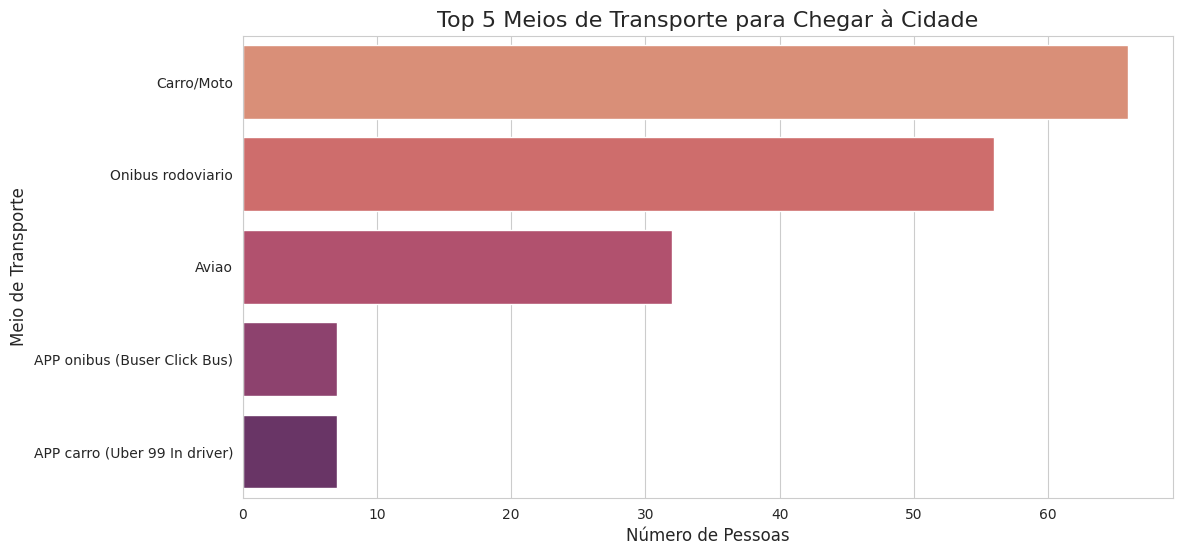

In [ ]:
# define o tamanho da figura
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_transporte.head(5),
    x='total',
    y='transporteparacidade',
    palette='flare'
)
plt.title('Top 5 Meios de Transporte para Chegar à Cidade', fontsize=16) # título do gráfico
plt.xlabel('Número de Pessoas', fontsize=12) # rótulo do eixo x
plt.ylabel('Meio de Transporte', fontsize=12) # rótulo do eixo y
plt.show()

###Principais Meios de Hospedagem (Visitantes)

In [ ]:
# query para identificar os 3 principais meios de hospedagem para visitantes
query_hospedagem_top3 = """
SELECT
  meiodehospedagem,
  COUNT(*) AS total
FROM tabelafinal
WHERE morador = 'Visitante' AND meiodehospedagem IS NOT NULL
GROUP BY meiodehospedagem
ORDER BY total DESC
LIMIT 3;
"""
df_hospedagem_top3 = executar_query(query_hospedagem_top3, engine)
print("\n Top 3 Meios de Hospedagem (Visitantes) ")
display(df_hospedagem_top3)



 Top 3 Meios de Hospedagem (Visitantes) 


,meiodehospedagem,total
0,Casa de Amigos/Parentes,112
1,Hoteis/Pousadas,21
2,Casa propria,12


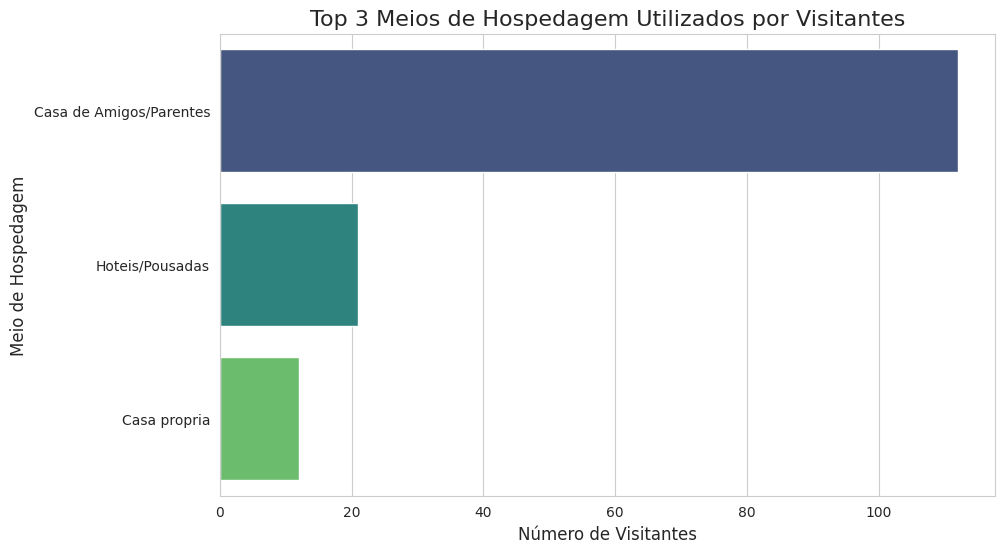

In [ ]:
# define o tamanho da figura
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_hospedagem_top3,
    x='total',
    y='meiodehospedagem',
    palette='viridis'
)
plt.title('Top 3 Meios de Hospedagem Utilizados por Visitantes', fontsize=16) # título do gráfico
plt.xlabel('Número de Visitantes', fontsize=12)# rótulo do eixo x
plt.ylabel('Meio de Hospedagem', fontsize=12)# rótulo do eixo y
plt.show()

###Análise de Pernoite dos Visitantes

Aqui verificamos a proporção de visitantes que dormiram na cidade e a média de noites que permaneceram.



In [66]:
# query da média de pernoites dos visitantes
query_media_pernoite = """
SELECT
    COALESCE(ROUND(AVG(quantaspernoites), 2), 0) AS media_pernoites
FROM tabelafinal
WHERE morador = 'Visitante' AND quantaspernoites IS NOT NULL;
"""
df_media_pernoite = executar_query(query_media_pernoite, engine)
print("\n-- Média de Pernoites (Filtro 'Visitante') --")
display(df_media_pernoite)



-- Média de Pernoites (Filtro 'Visitante') --


,media_pernoites
0,4.69


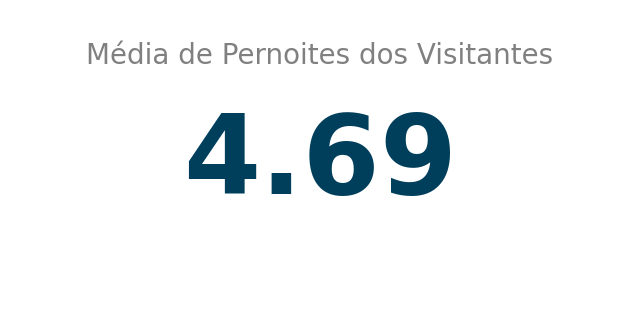

In [67]:

media_valor = df_media_pernoite['media_pernoites'].iloc[0]

# área do gráfico
fig, ax = plt.subplots(figsize=(8, 4))

#formatação do texto para o valor principal
ax.text(0.5, 0.5, f'{media_valor:.2f}',
        ha='center',
        va='center',
        fontsize=80,
        fontweight='bold',
        color='#003f5c') # cor escura para o número

# ttítulo/descrição
ax.text(0.5, 0.85, 'Média de Pernoites dos Visitantes',
        ha='center',
        va='center',
        fontsize=20,
        color='gray')

# visual clean
ax.axis('off')
plt.show()

###Média de Gastos por Categoria (Apenas Visitantes)

Gasto médio Visitantes

In [29]:
query_gastos_visitantes = """
SELECT
    COALESCE(ROUND(AVG(NULLIF(gastoalimentacao, 999999)), 2), 0) AS media_alimentacao,
    COALESCE(ROUND(AVG(NULLIF(gastotransporte, 999999)), 2), 0) AS media_transporte,
    COALESCE(ROUND(AVG(NULLIF(gastofatansias, 999999)), 2), 0) AS media_fantasias,
    COALESCE(ROUND(AVG(NULLIF(gastocompras, 999999)), 2), 0) AS media_compras,
    COALESCE(ROUND(AVG(NULLIF(gastoingressos, 999999)), 2), 0) AS media_ingressos,
    COALESCE(ROUND(AVG(NULLIF(gastooutros, 999999)), 2), 0) AS media_outros,
    COALESCE(ROUND(AVG(NULLIF(gastototal, 999999)), 2), 0) AS media_total,
    COALESCE(ROUND(AVG(NULLIF(gastomediodiario, 999999)), 2), 0) AS media_diario
FROM tabelafinal
WHERE morador = 'Visitante';
"""
df_gastos_visitantes= executar_query(query_gastos_visitantes, engine)
print("\n-- Média de Gastos por Categoria (Visitantes, Nova Versão com Filtro 'Visitante') --")
display(df_gastos_visitantes)



-- Média de Gastos por Categoria (Visitantes, Nova Versão com Filtro 'Visitante') --


,media_alimentacao,media_transporte,media_fantasias,media_compras,media_ingressos,media_outros,media_total,media_diario
0,540.71,169.12,69.51,129.57,71.2,14.09,97152.83,24858.51


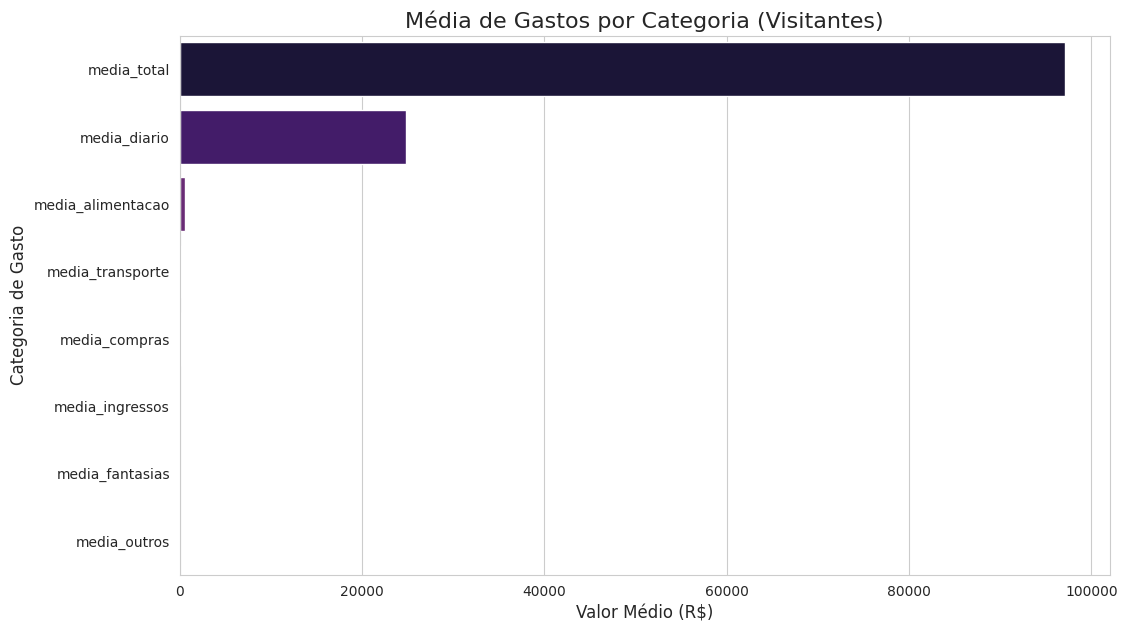

In [30]:
#  visualizando o dataframe em wide
df_gastos_visitantes_melted = df_gastos_visitantes.melt(var_name='Categoria de Gasto', value_name='Valor Médio (R$)')

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_gastos_visitantes_melted.sort_values('Valor Médio (R$)', ascending=False),
    x='Valor Médio (R$)',
    y='Categoria de Gasto',
    palette='magma'
)
plt.title('Média de Gastos por Categoria (Visitantes)', fontsize=16) # título do gráfico
plt.xlabel('Valor Médio (R$)', fontsize=12) # rótulo do eixo x
plt.ylabel('Categoria de Gasto', fontsize=12) # rótulo do eixo y
plt.show()

### Média de Gastos por Categoria (Geral)

In [26]:
# query para média gerais
query_gastos_geral = """
SELECT
  COALESCE(ROUND(AVG(NULLIF(gastohospedagem, 999999)), 2), 0) AS hospedagem,
  COALESCE(ROUND(AVG(NULLIF(gastoatrativos, 999999)), 2), 0) AS atrativos,
  COALESCE(ROUND(AVG(NULLIF(gastoalimentacao, 999999)), 2), 0) AS alimentacao,
  COALESCE(ROUND(AVG(NULLIF(gastotransporte, 999999)), 2), 0) AS transporte,
  COALESCE(ROUND(AVG(NULLIF(gastofatansias, 999999)), 2), 0) AS fantasias,
  COALESCE(ROUND(AVG(NULLIF(gastocompras, 999999)), 2), 0) AS compras,
  COALESCE(ROUND(AVG(NULLIF(gastoingressos, 999999)), 2), 0) AS ingressos,
  COALESCE(ROUND(AVG(NULLIF(gastooutros, 999999)), 2), 0) AS outros
FROM tabelafinal;
"""
df_gastos_geral = executar_query(query_gastos_geral, engine)
print("\n-- Média de Gastos por Categoria (Geral) --")
display(df_gastos_geral)


-- Média de Gastos por Categoria (Geral) --


,hospedagem,atrativos,alimentacao,transporte,fantasias,compras,ingressos,outros
0,346.96,358.21,312.33,101.35,52.13,77.2,28.8,8.05


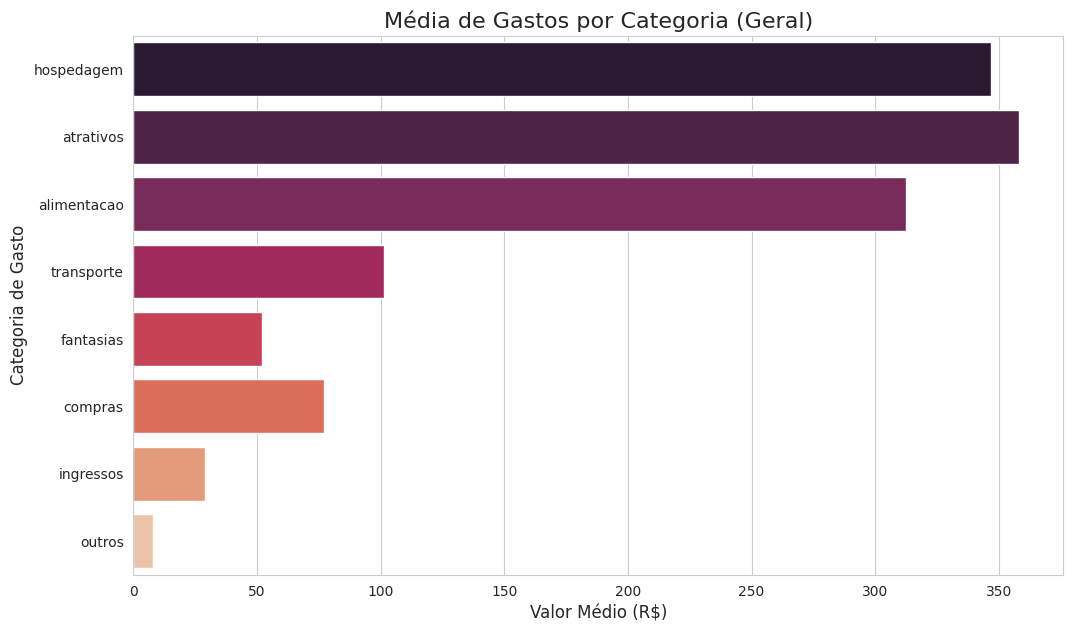

In [27]:
# ransforma o dataframe para wide
df_gastos_geral_melted = df_gastos_geral.melt(var_name='Categoria de Gasto', value_name='Valor Médio (R$)')
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_gastos_geral_melted,
    x='Valor Médio (R$)',
    y='Categoria de Gasto',
    palette='rocket'
)
plt.title('Média de Gastos por Categoria (Geral)', fontsize=16) # título do gráfico
plt.xlabel('Valor Médio (R$)', fontsize=12) # rótulo do eixo x
plt.ylabel('Categoria de Gasto', fontsize=12) # rótulo do eixo y
plt.show()


Esta análise calcula o valor médio gasto em diferentes categorias por todos os participantes (moradores e visitantes).

In [54]:
# query para média de gastos gerais
query_gastos_geral = """
SELECT
  ROUND(AVG(NULLIF(gastohospedagem, 999999)), 2) AS hospedagem,
  ROUND(AVG(NULLIF(gastoatrativos, 999999)), 2) AS atrativos,
  ROUND(AVG(NULLIF(gastoalimentacao, 999999)), 2) AS alimentacao,
  ROUND(AVG(NULLIF(gastotransporte, 999999)), 2) AS transporte,
  ROUND(AVG(NULLIF(gastofatansias, 999999)), 2) AS fantasias,
  ROUND(AVG(NULLIF(gastocompras, 999999)), 2) AS compras,
  ROUND(AVG(NULLIF(gastoingressos, 999999)), 2) AS ingressos,
  ROUND(AVG(NULLIF(gastooutros, 999999)), 2) AS outros
FROM tabelafinal;
"""
df_gastos_geral = executar_query(query_gastos_geral, engine)
print("\n Média de Gastos por Categoria (Geral) ")
display(df_gastos_geral)


 Média de Gastos por Categoria (Geral) 


,hospedagem,atrativos,alimentacao,transporte,fantasias,compras,ingressos,outros
0,346.96,358.21,312.33,101.35,52.13,77.2,28.8,8.05


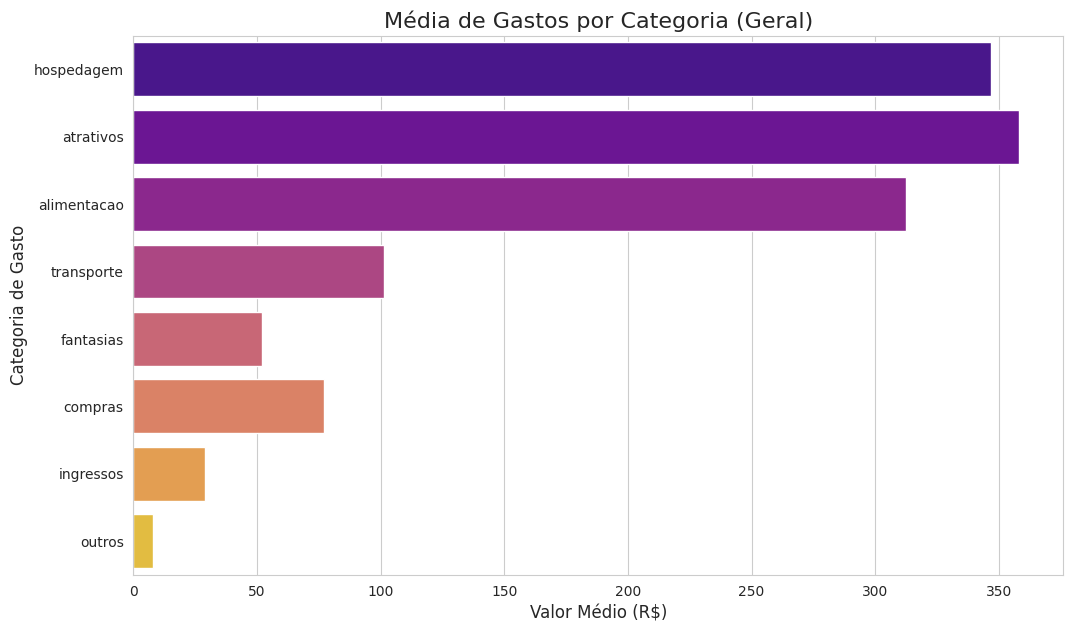

In [ ]:

# reformatando o dataframe (de wide para long) para a visualização

df_gastos_geral_melted = df_gastos_geral.melt(var_name='Categoria de Gasto', value_name='Valor Médio (R$)')

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_gastos_geral_melted,
    x='Valor Médio (R$)',
    y='Categoria de Gasto',
    palette='plasma'
)
plt.title('Média de Gastos por Categoria (Geral)', fontsize=16) # título do gráfico
plt.xlabel('Valor Médio (R$)', fontsize=12)  # rótulo do eixo x
plt.ylabel('Categoria de Gasto', fontsize=12) # rótulo do eixo y
plt.show()

# Finalização

In [53]:
from datetime import datetime

# fechando a conexão com o banco de dados
conn.close()
print("✅ Análise concluída e conexão com o banco de dados fechada.")

# anuncia a data e a hora do fechamento
print(f"❌ Conexão fechada às {datetime.now().strftime('%H:%M:%S')} de {datetime.now().strftime('%d/%m/%Y')}.")

✅ Análise concluída e conexão com o banco de dados fechada.
❌ Conexão fechada às 19:19:19 de 05/10/2025.


# 🔍 Insights

Perfil dos Participantes
A query agrupa os dados por quatro características simultaneamente (gênero, escolaridade, estado civil e renda) para encontrar os "perfis" mais comuns.
Os perfis mais frequentes são de pessoas solteiras, com ensino superior ou médio completo, e renda concentrada entre 1 e 5 salários mínimos. Isso pinta um retrato claro do público principal do evento.


Moradores vs. Visitantes
O fato de que 85% dos participantes são moradores indica que o Carnaval de BH é, predominantemente, um evento para a própria cidade, e não primariamente turístico.
•	A avaliação média (segurança, preços) dos visitantes é diferente da dos moradores?
•	Os visitantes gastam mais que os moradores (excluindo hospedagem)?
•	Os blocos preferidos dos visitantes são os mesmos dos moradores?


Origem dos Visitantes
A grande maioria dos visitantes brasileiros são de Minas Gerais e São Paulo. A presença internacional é mínima, reforçando o caráter do evento.


Popularidade dos Blocos
Há um empate técnico impressionante entre os 4 blocos mais populares ("Quando Come Se Lambuza", "Funk You", "Então Brilha!", "Bloco da Calixto"). Isso sugere que não há um único "dono" do carnaval, mas sim um conjunto de grandes atrações.


Fontes de Informação
A descoberta de que "Amigos/Parentes" é a principal fonte de informação (82 respostas), superando com folga "Mídias Sociais" (34) e "Internet" (29), é um insight de marketing valiosíssimo. O "boca a boca" ainda é o rei absoluto na comunicação do evento.


Avaliação Geral do Evento
A avaliação geral do evento é muito alta (8.67). No entanto, os pontos fracos são claramente, Preços (6.11) e Banheiros (6.25), que receberam notas significativamente mais baixas. Esta é uma crítica construtiva e direcionada para a organização.
Análise de Gastos



Foco Estratégico em Visitantes: Um ponto forte notável é a segmentação clara e a análise aprofundada do público visitante. A apresentação de dados sobre origem , hospedagem e gastos  fornece subsídios diretos para estratégias de turismo e desenvolvimento econômico.

# 🧠 Lições Aprendidas

Na organização dos dados do questionário para tabela, alguns estados se juntaram a paises na coluna de ufpais.




O valor `999999` foi tratado como "não respondeu" e não entra no cálculo da média.

 Os valores médios para gastos estavam astronomicamente altos (ex: 5.86e+13 para hospedagem). indicando que tinhamos valores errados ou outliers extremos na base de dados que não foram filtrados pelo NULLIF. Realizamos reclassificação e limpeza de dados.

Não aprofundamento em dados de baixa qualidade: a análise sobre patrocinadores revela que "Não sabe" e "Não respondeu" estão entre as respostas mais frequentes.

Ausência de interpretação textual e profundidade do questionario.

# Perguntas e Respostas:


1.🧐 **Problema:** A principal fonte de informação do carnaval é o "boca a boca" (Amigos/Parentes). Como a organização pode controlar melhor a narrativa e a divulgação oficial?

💡 **Solução:** Investir pesadamente em "Mídias Sociais" e "Internet", que são a segunda e terceira fontes mais usadas. Criar conteúdo oficial de alta qualidade e fácil de compartilhar (guias, mapas, vídeos) para que o público se torne um multiplicador da informação correta.




2.🧐 **Problema:** A popularidade dos blocos de rua é extremamente concentrada, com os 4 primeiros tendo quase a mesma quantidade de citações. Como a prefeitura pode incentivar a descentralização e evitar a superlotação?


💡 **Solução:** Utilizar os canais de mídia social para promover "circuitos alternativos", destacando blocos menores e de bairros diferentes. Oferecer infraestrutura de qualidade (banheiros, segurança) para esses blocos pode atrair o público que busca experiências menos lotadas.



3.🧐 **Problema:** A maioria dos foliões (84,9%) são, na verdade, moradores da própria cidade. Como aumentar a atratividade do evento para turistas de outros estados e países?


💡 **Solução:** A análise mostra que os poucos visitantes de fora se hospedam principalmente em "Casa de Amigos/Parentes". A criação de pacotes turísticos atrativos em parceria com a rede hoteleira e companhias de ônibus poderia ser um caminho eficaz.



4.🧐 **Problema:** A análise de satisfação com itens essenciais (banheiros, segurança, preços) falhou por um erro técnico. Como a organização pode planejar melhorias para o próximo ano sem esses dados?


💡 **Solução:** A prioridade máxima é corrigir o erro na query (provavelmente um nome de coluna incorreto) e reprocessar a análise imediatamente. Operar sem esses KPIs críticos é um risco muito grande para o planejamento do próximo evento.



5.🧐 **Problema:** O reconhecimento dos patrocinadores privados é baixo; a Prefeitura é a entidade mais lembrada, de longe. Como as marcas podem aumentar seu retorno sobre o investimento?


💡 **Solução:** As marcas devem focar em ativações dentro dos blocos mais populares. Em vez de publicidade passiva, deveriam oferecer experiências úteis e memoráveis, como distribuição de água, carregadores de celular ou espaços de descanso, associando positivamente a marca à experiência do folião.



6.🧐 **Problema:** O gasto médio dos visitantes é alto em hospedagem e atrativos, mas baixo em "compras". Como incentivar o consumo no comércio local?


💡 **Solução:** Criar polos de economia criativa e feiras de artesanato em locais estratégicos de passagem dos blocos. Parcerias com o comércio local para oferecer descontos a foliões identificados (com pulseiras, por exemplo) também poderiam estimular o consumo.



7.🧐 **Problema:** O público tem um perfil de renda concentrado nas faixas mais baixas (maioria entre 1 a 5 salários mínimos). Como garantir que o evento seja financeiramente acessível?


💡 **Solução:** Focar em parcerias com patrocinadores de bebidas e alimentos para subsidiar os preços, garantindo opções populares e de baixo custo.
Além disso, manter a gratuidade da vasta maioria dos blocos de rua é essencial.




8.🧐 **Problema:** A mediana de idade do público é de 30 anos. Como o evento pode ser mais inclusivo para famílias e pessoas mais velhas?

💡 **Solução:** Criar e divulgar amplamente um "circuito família", com blocos em horários diurnos, com volume de som mais baixo e em locais de fácil acesso. A curadoria de blocos com repertórios de marchinhas tradicionais também pode atrair o público mais velho.


9.🧐 **Problema:** Os visitantes ficam em média 4,69 noites na cidade. Como incentivar uma permanência mais longa, aumentando o impacto econômico?


💡 **Solução:** Criar uma agenda de eventos "pós-carnaval" para a quinta e sexta-feira seguintes, como festivais gastronômicos ou shows de encerramento. Isso daria aos turistas um motivo para estender a estadia pelo fim de semana inteiro.



10.🧐 **Problema:** A maioria dos visitantes brasileiros vem de estados próximos como São Paulo, Espírito Santo e Rio de Janeiro. Como diversificar a origem dos turistas nacionais?


💡 **Solução:** Criar campanhas de marketing digital geolocalizadas para estados com menor representatividade, mas com alto potencial, como os do Sul e Nordeste. Parcerias com influenciadores digitais dessas regiões poderiam ser uma estratégia eficaz para despertar o interesse.


# PARA NOVAS CONSULTAS⚠️ ATENÇÃO



Após a célula de encerramento (conn.close()), o banco de dados em memória é destruído.


`Para realizar novas consultas, é necessário reabrir a conexão e executar novamente o script de criação e inserção de dados.`

**negrito**
Para isso utlize o tabelafinal.csv

⚠️ ATENÇÃO ⚠️

**Isso somente se aplicará ao notebook que estiver está informaçãodestacada.**
